In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pnevmoniya/sample_solution.csv
/kaggle/input/pnevmoniya/test/test_img_10340.jpeg
/kaggle/input/pnevmoniya/test/test_img_10168.jpeg
/kaggle/input/pnevmoniya/test/test_img_10613.jpeg
/kaggle/input/pnevmoniya/test/test_img_10368.jpeg
/kaggle/input/pnevmoniya/test/test_img_10036.jpeg
/kaggle/input/pnevmoniya/test/test_img_10527.jpeg
/kaggle/input/pnevmoniya/test/test_img_10020.jpeg
/kaggle/input/pnevmoniya/test/test_img_10585.jpeg
/kaggle/input/pnevmoniya/test/test_img_10276.jpeg
/kaggle/input/pnevmoniya/test/test_img_10054.jpeg
/kaggle/input/pnevmoniya/test/test_img_10298.jpeg
/kaggle/input/pnevmoniya/test/test_img_10355.jpeg
/kaggle/input/pnevmoniya/test/test_img_10511.jpeg
/kaggle/input/pnevmoniya/test/test_img_10410.jpeg
/kaggle/input/pnevmoniya/test/test_img_10096.jpeg
/kaggle/input/pnevmoniya/test/test_img_10219.jpeg
/kaggle/input/pnevmoniya/test/test_img_10057.jpeg
/kaggle/input/pnevmoniya/test/test_img_10296.jpeg
/kaggle/input/pnevmoniya/test/test_img_10407.jpeg
/kagg

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.491551,0.220793,0.941515,0.983522,01:08


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.158170,0.186298,0.955896,0.996999,01:11
1,0.110515,0.065793,0.976989,0.996472,01:10
2,0.058354,0.057015,0.985618,0.995188,01:10
3,0.028181,0.046708,0.987536,0.997835,01:10


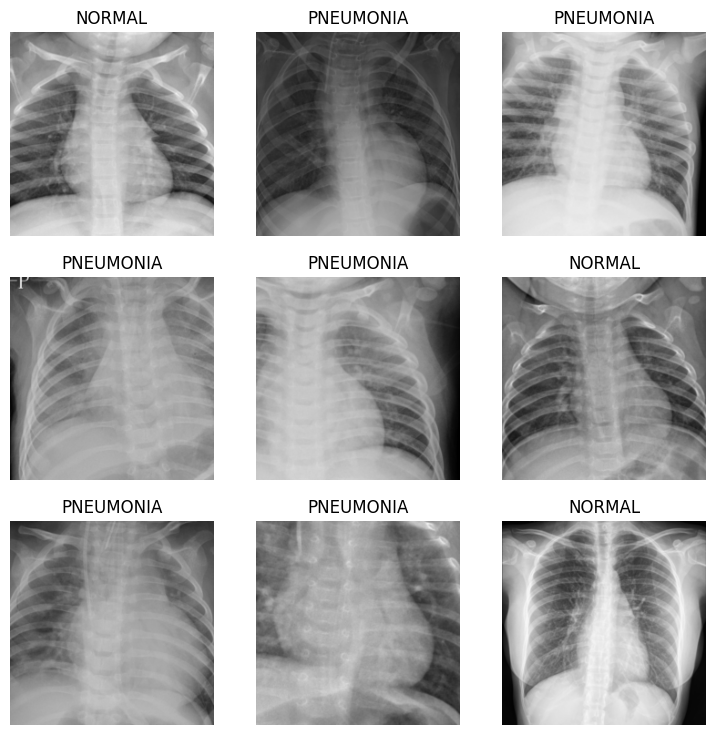

In [7]:
# Import required libraries
from fastai.vision.all import *
from pathlib import Path
import pandas as pd

# Set dataset path 
path = Path('/kaggle/input/pnevmoniya/train')  

# Define DataBlock
pneumonia_data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),  
    get_items=get_image_files,          
    splitter=RandomSplitter(valid_pct=0.2, seed=12),  
    get_y=parent_label,                  
    item_tfms=Resize(224)                 
)

# Create DataLoaders
dls = pneumonia_data.dataloaders(path)

# Show some samples
dls.show_batch(max_n=9)

# CNN model
learn = vision_learner(dls, resnet34, metrics=[accuracy, RocAucBinary()])

# Train the model
learn.fine_tune(4)

# Save trained model
learn.save('/kaggle/working/pneumonia_model')

# Load Test Images
test_path = Path('/kaggle/input/pnevmoniya/test')  # Update with actual test path
test_files = get_image_files(test_path)

# Make Predictions on Test Set
test_dl = learn.dls.test_dl(test_files)
preds, _ = learn.get_preds(dl=test_dl)
labels = preds.argmax(dim=1)  # Convert probabilit0ies to class labels


In [11]:
# Create Submission File
submission_df = pd.DataFrame({'id': [f.name for f in test_files], 'labels': labels})
submission_df.to_csv('/kaggle/working/my_submission_020525.csv', index=False)